Анализ структуры обучения

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Проверка текущей рабочей директории
print(os.getcwd())



d:\xampp\htdocs\PYTHON\home3


## Лекции


In [6]:

# Загрузка файла лекций
lectures_df = pd.read_csv('./lectures.csv')

total_amount_lectures = lectures_df['lecture_id'].nunique()
# Подсчет количества уникальных тегов (tag)
unique_tags = lectures_df['tag'].nunique()
print(f'Количество уникальных тегов: {unique_tags}')

# Поиск самого частого тега (tag)
most_common_tag = lectures_df['tag'].value_counts().idxmax()
print(f'Самый частый тег: {most_common_tag}')

# Подсчет количества лекций по тегам (tag)
tag_counts = lectures_df['tag'].value_counts()

# Подсчет количества уникальных категорий лекций (part)
unique_parts = lectures_df['part'].nunique()
print(f'Количество уникальных категорий лекций (part): {unique_parts}')

# Перечисление уникальных категорий лекций (part)
unique_parts_list = lectures_df['part'].unique()
print(f'Уникальные категории лекций (part): {unique_parts_list}')

# Подсчет количества уникальных элементов с определенным значением part
part_value = 1  # Здесь можно указать нужное значение part
unique_elements_for_part = lectures_df[lectures_df['part'] == part_value]['lecture_id'].nunique()
print(f'Количество уникальных элементов для part = {part_value}: {unique_elements_for_part}')

# Поиск самой частой части TOEIC test
most_common_part = lectures_df['part'].value_counts().idxmax()
most_common_part_count = lectures_df['part'].value_counts().max()
print(f'Самая частая часть TOEIC test: part {most_common_part} (встречается {most_common_part_count} раз)')

# Подсчет количества лекций по категориям (part)
part_counts = lectures_df['part'].value_counts().sort_index()
colors = plt.cm.Paired.colors

unique_type_of = lectures_df['type_of'].nunique()
part_type_of = lectures_df['type_of'].value_counts()



Количество уникальных тегов: 151
Самый частый тег: 136
Количество уникальных категорий лекций (part): 7
Уникальные категории лекций (part): [5 1 6 2 7 3 4]
Количество уникальных элементов для part = 1: 54
Самая частая часть TOEIC test: part 5 (встречается 143 раз)


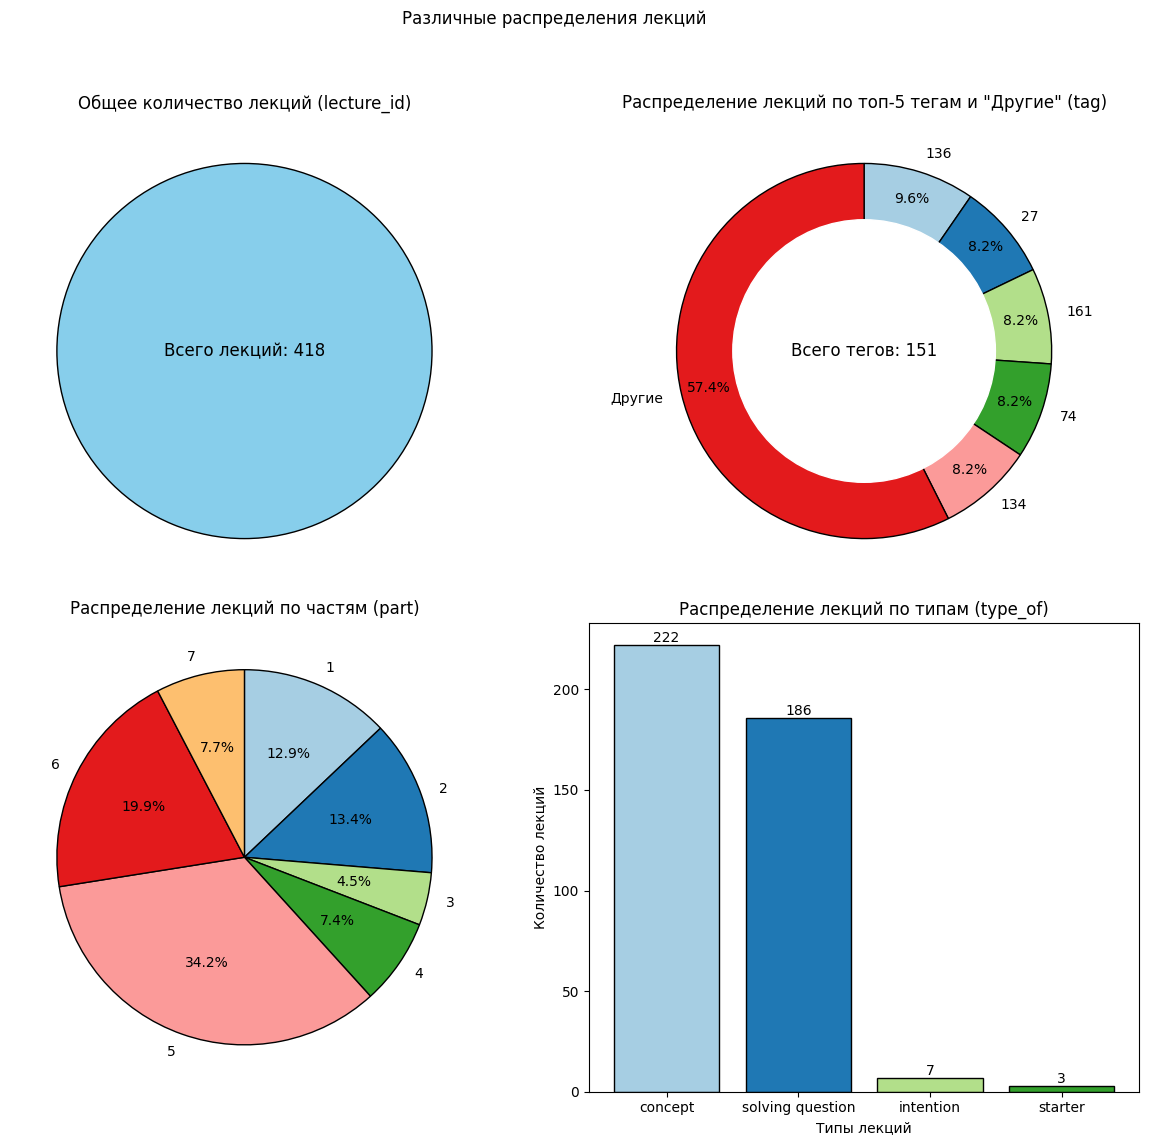

In [141]:
# Построение четырех диаграмм на одной фигуре
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}

axes[0].pie([1], colors=['skyblue'], wedgeprops=wedgeprops)
axes[0].text(0, 0, f'Всего лекций: {total_amount_lectures}', horizontalalignment='center', verticalalignment='center', fontsize=12)
axes[0].set_title('Общее количество лекций (lecture_id)')

# Первый график - пончиковая диаграмма по тегам (топ-5 тегов + другие)
tag_counts_top5 = tag_counts.head(5)
other_tags_count = min(tag_counts.iloc[5:].sum(), tag_counts.sum() * 0.10)
tag_counts_top5['Другие'] = other_tags_count
axes[1].pie(tag_counts_top5.values, labels=tag_counts_top5.index, autopct='%1.1f%%', startangle=90, colors=colors, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.85)
axes[1].add_artist(plt.Circle((0, 0), 0.70, color='white'))
axes[1].text(0, 0, f'Всего тегов: {unique_tags}', horizontalalignment='center', verticalalignment='center', fontsize=12)
axes[1].set_title(f'Распределение лекций по топ-5 тегам и "Другие" (tag)')

# Второй график - круговая диаграмма по категориям (part)
axes[2].pie(part_counts.values, labels=part_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, counterclock=False, wedgeprops=wedgeprops)
axes[2].set_title('Распределение лекций по частям (part)')

# Третий график - диаграмма по типам лекций (type_of)
bars = axes[3].bar(part_type_of.index, part_type_of.values, color=colors, edgecolor='black')
axes[3].set_xlabel('Типы лекций')
axes[3].set_ylabel('Количество лекций')
axes[3].set_title(f'Распределение лекций по типам (type_of)')

# Добавление значений на бары
for bar in bars:
    height = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Различные распределения лекций')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Вопросы 

In [202]:
# Загрузка файла лекций с использованием относительного пути
questions_df = pd.read_csv('./questions.csv')
unique_questions = questions_df['question_id'].nunique()

print(f'Количество уникальных вопросов: {unique_questions}')

unique_bundle = questions_df['bundle_id'].nunique()
print(f'Количество уникальных bundle_id: {unique_bundle}')

unique_part = questions_df['part'].nunique()
unique_part_list = questions_df['part'].value_counts()
print(f'Количество уникальных part: {unique_part}')

# Разделение значений столбца 'tags' и создание списка всех тегов
questions_df['tags'] = questions_df['tags'].str.split()

# Используем explode() для "разворачивания" списка тегов в каждой строке в отдельные строки
all_tags_series = questions_df['tags'].explode()
unique_tags = all_tags_series.nunique()
tags_counts = all_tags_series.value_counts()
print(f'Количество уникальных tags: {unique_tags}')

all_correct_answer = questions_df['correct_answer'].value_counts()
print("Самый частый правильный ответ",all_correct_answer.idxmax())

Количество уникальных вопросов: 13523
Количество уникальных bundle_id: 9765
Количество уникальных part: 7
Количество уникальных tags: 188
Самый частый правильный ответ 0


Text(0, 0, '188')

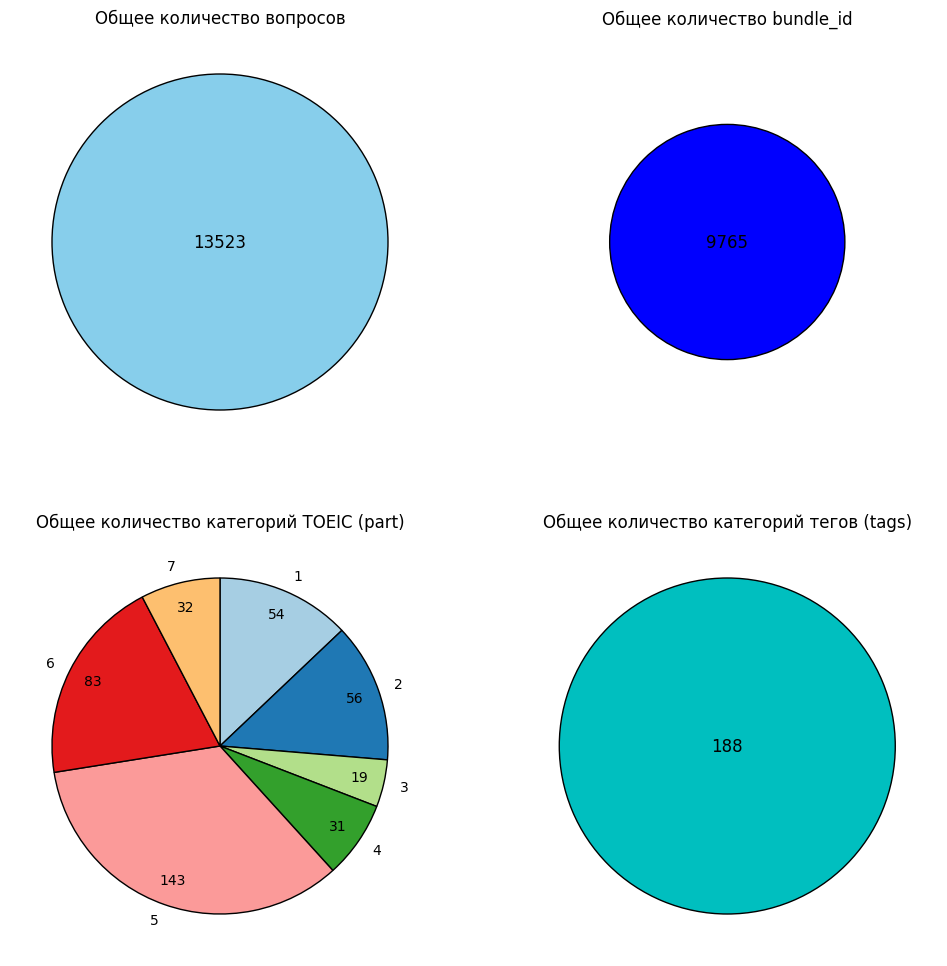

In [198]:
fix, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()

axes[0].pie([1], colors=['skyblue'], wedgeprops=wedgeprops)
axes[0].set_title('Общее количество вопросов')
axes[0].text(0, 0, unique_questions, horizontalalignment='center', verticalalignment='center', fontsize=12)

axes[1].pie([1], colors = ['blue'], wedgeprops=wedgeprops, radius=0.7)
axes[1].set_title('Общее количество bundle_id')
axes[1].text(0, 0, unique_bundle, horizontalalignment = 'center', va = 'center', fontsize = 12)

wedges, texts, autotexts = axes[2].pie(
    part_counts.values,
    labels=part_counts.index,  # Категории (номера) будут отображаться снаружи
    startangle=90,
    colors=colors,
    counterclock=False,
    wedgeprops=wedgeprops,
    autopct='%1.1f%%',  # Включаем отображение процентного значения
    pctdistance=0.85  # Расстояние для процента
)
# Добавление значений внутрь сегментов
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{part_counts.values[i]}')  # Установка значения внутри сегмента
axes[2].set_title('Общее количество категорий TOEIC (part)')

axes[3].pie([1], colors='coralred', wedgeprops=wedgeprops)
axes[3].set_title('Общее количество категорий тегов (tags)')
axes[3].text(0, 0, unique_tags, horizontalalignment='center', verticalalignment='center', fontsize=12)


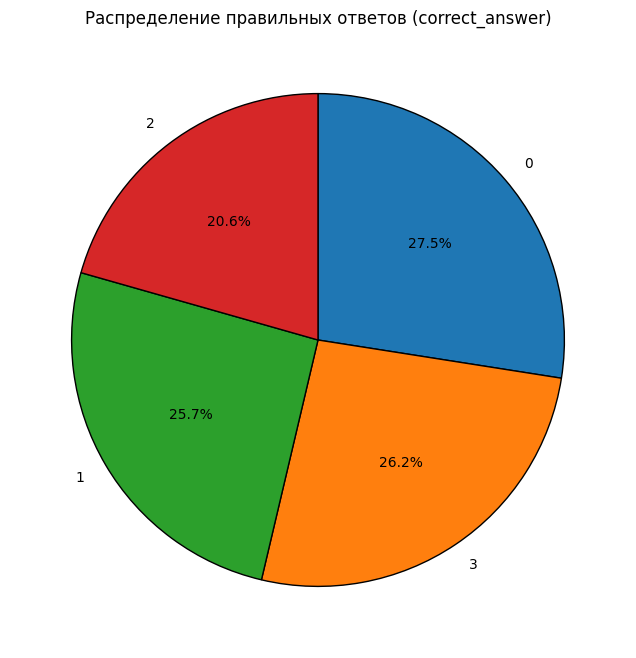

In [204]:
# Построение круговой диаграммы для распределения правильных ответов
plt.figure(figsize=(8, 8))
plt.pie(all_correct_answer.values, labels=all_correct_answer.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Распределение правильных ответов (correct_answer)')
plt.show()

## Пользовательский опыт

In [87]:
# Определение типов данных для оптимизации памяти
dtypes = {
    'row_id': 'int32',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}

# Задаем размер куска, например 1 миллион строк
chunksize = 10**6

# Множество для хранения уникальных user_id
unique_users = set()

# Чтение файла по частям и добавление уникальных user_id
for chunk in pd.read_csv('./train.csv', dtype=dtypes, chunksize=chunksize):
    unique_users.update(chunk['user_id'].unique())

# Подсчет общего количества уникальных пользователей
print(f'Количество уникальных пользователей: {len(unique_users)}')

Количество уникальных пользователей: 393656


In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка файла train.csv с использованием chunksize для экономии памяти
chunksize = 10**6

# Метрики для анализа
time_spent_per_user = {}

# Обработка чанков для расчета времени на обучение
for chunk in pd.read_csv('./train.csv', dtype=dtypes, chunksize=chunksize):
    chunk_time_spent = chunk[chunk['prior_question_elapsed_time'].notna()].groupby('user_id')['prior_question_elapsed_time'].sum()
    for user_id, time_spent in chunk_time_spent.items():
        if user_id in time_spent_per_user:
            time_spent_per_user[user_id] += time_spent
        else:
            time_spent_per_user[user_id] = time_spent

# Перевод времени из миллисекунд в часы
time_spent_per_user_hours = pd.Series(time_spent_per_user) / (1000 * 60 * 60)

# Расчет среднего времени, проведенного пользователем за обучением в часах
average_time_spent_hours = time_spent_per_user_hours.mean()
print(f'\nСреднее время, проведенное пользователем за обучением: {average_time_spent_hours:.2f} часов')



Среднее время, проведенное пользователем за обучением: 1.77 часов


Средний процент правильных ответов для пользователей, которые занимались меньше среднего времени: 57.40%
Средний процент правильных ответов для пользователей, которые занимались больше среднего времени: 67.70%


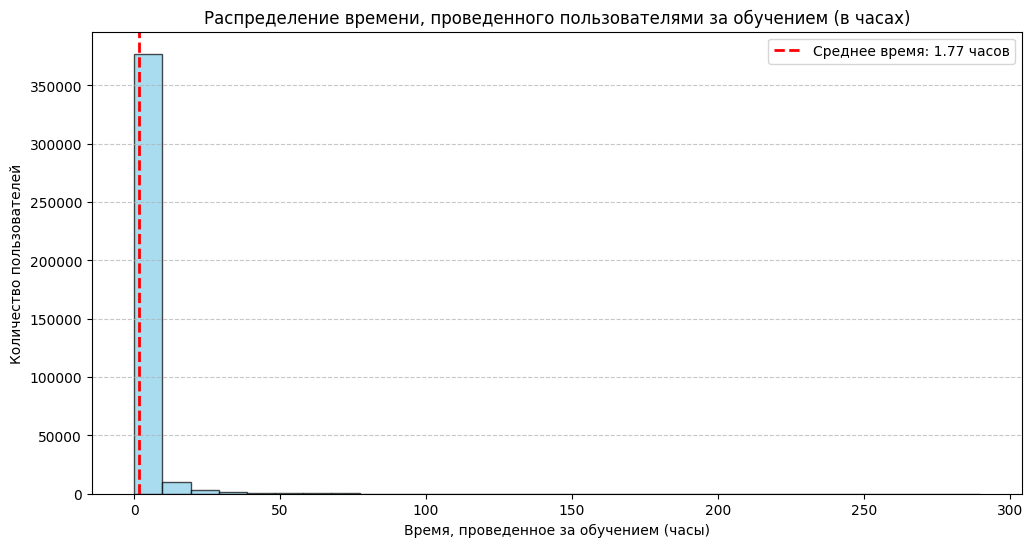

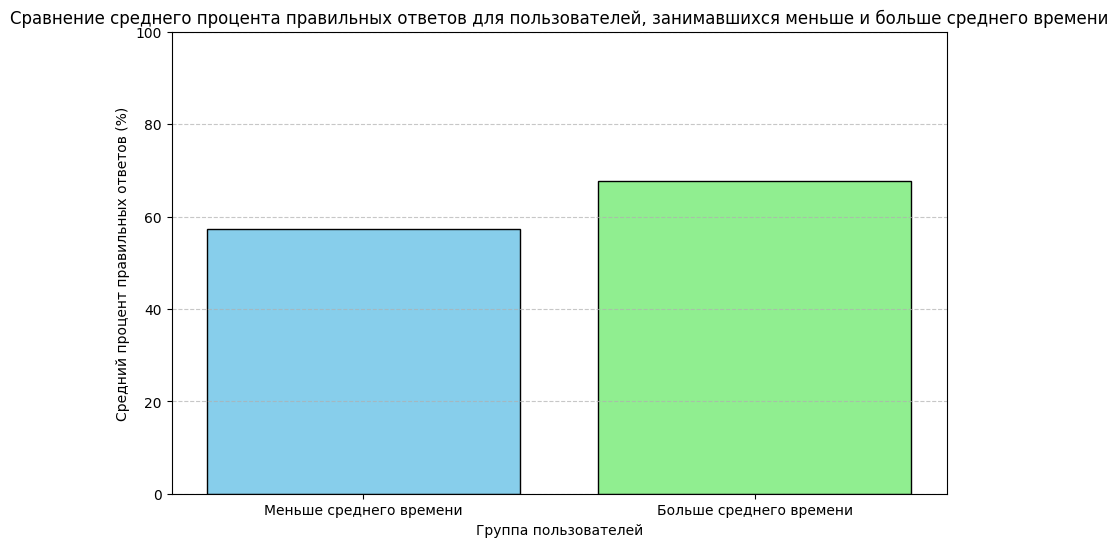

In [86]:
# Метрики для пользователей, которые занимались больше и меньше среднего времени
less_time_correct_answers = []
more_time_correct_answers = []
# Обработка чанков для расчета правильных ответов
for chunk in pd.read_csv('./train.csv', dtype=dtypes, chunksize=chunksize):
    # Добавление информации о времени на обучение через обычное обновление
    chunk['total_time_spent_hours'] = chunk['user_id'].map(time_spent_per_user_hours)

    # Разделение пользователей на две группы: меньше и больше среднего времени
    less_time_users = chunk[chunk['total_time_spent_hours'] < average_time_spent_hours]
    more_time_users = chunk[chunk['total_time_spent_hours'] >= average_time_spent_hours]

    # Средний процент правильных ответов для пользователей, которые занимались меньше среднего времени
    if not less_time_users.empty:
        less_time_correct_answers.append(less_time_users[less_time_users['answered_correctly'] != -1]['answered_correctly'].mean() * 100)

    # Средний процент правильных ответов для пользователей, которые занимались больше среднего времени
    if not more_time_users.empty:
        more_time_correct_answers.append(more_time_users[more_time_users['answered_correctly'] != -1]['answered_correctly'].mean() * 100)
# Расчет среднего процента правильных ответов для пользователей, которые занимались меньше и больше среднего времени
average_less_time_correct_answers = pd.Series(less_time_correct_answers).mean()
average_more_time_correct_answers = pd.Series(more_time_correct_answers).mean()

print(f'Средний процент правильных ответов для пользователей, которые занимались меньше среднего времени: {average_less_time_correct_answers:.2f}%')
print(f'Средний процент правильных ответов для пользователей, которые занимались больше среднего времени: {average_more_time_correct_answers:.2f}%')

# Построение гистограммы распределения времени, проведенного пользователями за обучением
plt.figure(figsize=(12, 6))
plt.hist(time_spent_per_user_hours, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_time_spent_hours, color='red', linestyle='--', linewidth=2, label=f'Среднее время: {average_time_spent_hours:.2f} часов')
plt.xlabel('Время, проведенное за обучением (часы)')
plt.ylabel('Количество пользователей')
plt.title('Распределение времени, проведенного пользователями за обучением (в часах)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Построение столбчатой диаграммы для сравнения результатов
plt.figure(figsize=(10, 6))
groups = ['Меньше среднего времени', 'Больше среднего времени']
correct_answers = [average_less_time_correct_answers, average_more_time_correct_answers]
plt.bar(groups, correct_answers, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.xlabel('Группа пользователей')
plt.ylabel('Средний процент правильных ответов (%)')
plt.title('Сравнение среднего процента правильных ответов для пользователей, занимавшихся меньше и больше среднего времени')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
# Метрики для анализа
correct_answers_count = {}
total_answers_count = {}
time_vs_correctness = []
lectures_viewed_per_user = {}
lecture_view_counts = {}

# Обработка чанков
for chunk in pd.read_csv('./train.csv', dtype=dtypes, chunksize=chunksize):
    # Частота правильных ответов для каждого пользователя
    questions_only = chunk[chunk['answered_correctly'] != -1]
    correct_answers_chunk = questions_only[questions_only['answered_correctly'] == 1].groupby('user_id')['answered_correctly'].count()
    total_answers_chunk = questions_only.groupby('user_id')['answered_correctly'].count()

    for user_id, correct_count in correct_answers_chunk.items():
        if user_id in correct_answers_count:
            correct_answers_count[user_id] += correct_count
        else:
            correct_answers_count[user_id] = correct_count

    for user_id, total_count in total_answers_chunk.items():
        if user_id in total_answers_count:
            total_answers_count[user_id] += total_count
        else:
            total_answers_count[user_id] = total_count

    # Связь между временем ответа и правильностью
    time_vs_correctness_chunk = chunk[chunk['answered_correctly'] != -1][['prior_question_elapsed_time', 'answered_correctly']]
    time_vs_correctness.append(time_vs_correctness_chunk)

    # Количество лекций на пользователя
    lectures_only = chunk[chunk['content_type_id'] == 1]
    lectures_view_chunk = lectures_only.groupby('user_id')['content_id'].count()

    for user_id, lecture_count in lectures_view_chunk.items():
        if user_id in lectures_viewed_per_user:
            lectures_viewed_per_user[user_id] += lecture_count
        else:
            lectures_viewed_per_user[user_id] = lecture_count

    # Подсчет просмотров каждой лекции
    lecture_view_chunk = lectures_only['content_id'].value_counts()

    for lecture_id, view_count in lecture_view_chunk.items():
        if lecture_id in lecture_view_counts:
            lecture_view_counts[lecture_id] += view_count
        else:
            lecture_view_counts[lecture_id] = view_count

# Конвертируем результаты в Series для дальнейшего анализа
correct_answers_count_series = pd.Series(correct_answers_count)
total_answers_count_series = pd.Series(total_answers_count)
correctness_per_user = (correct_answers_count_series / total_answers_count_series).fillna(0)

# Сортировка пользователей по количеству правильных ответов и выбор топ-10
top_10_users = correct_answers_count_series.sort_values(ascending=False).head(10)

# Создание таблицы DataFrame с дополнительной информацией
top_10_users_df = pd.DataFrame({
    'user_id': top_10_users.index,
    'correct_answers_count': top_10_users.values,
    'total_answers_count': total_answers_count_series.loc[top_10_users.index],
    'correctness_percentage': (correct_answers_count_series.loc[top_10_users.index] / total_answers_count_series.loc[top_10_users.index]) * 100
})

# Сброс индекса, чтобы `user_id` был частью таблицы, а не индексом
top_10_users_df.reset_index(drop=True, inplace=True)

# Форматирование столбца `correctness_percentage` с двумя знаками после запятой
top_10_users_df['correctness_percentage'] = top_10_users_df['correctness_percentage'].round(2)

# Установить индекс с 1
top_10_users_df.index = top_10_users_df.index + 1

# Вывод таблицы в Jupyter
display(top_10_users_df)

# Анализ лекций
lectures_viewed_per_user_series = pd.Series(lectures_viewed_per_user)
average_lectures_viewed = lectures_viewed_per_user_series.mean()
print(f'Сколько лекций в среднем просматривает каждый пользователь: {average_lectures_viewed:.2f}')

# Подсчет просмотров каждой лекции
lecture_view_counts_series = pd.Series(lecture_view_counts)

# Подсчет количества лекций, которые смотрели определенное количество раз
lecture_view_distribution = lecture_view_counts_series.value_counts().sort_index()

# Среднее количество просмотров лекций
average_views = lecture_view_counts_series.mean()
print(f'Среднее количество просмотров: {average_views:.2f}')

# Частота правильных ответов
correctness_overall = correctness_per_user.mean()
print(f'Средний процент правильных ответов: {correctness_overall * 100:.2f}%')

,user_id,correct_answers_count,total_answers_count,correctness_percentage
1,2139561972,14300,15690,91.14
2,1615528747,13678,15978,85.61
3,338684437,13416,15859,84.60
4,1842816145,13086,16533,79.15
5,1047202059,13034,16169,80.61
6,455973631,12840,16640,77.16
7,1478712595,12840,16842,76.24
8,801103753,12698,17609,72.11
9,1743444187,12644,16424,76.98
10,2070068957,12225,13210,92.54


Сколько лекций в среднем просматривает каждый пользователь: 13.09
Среднее количество просмотров: 4720.56
Средний процент правильных ответов: 54.52%
